<a href="https://colab.research.google.com/github/lamnguyen090405/FakeNewsDetection/blob/main/Project_DataAnalyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/DataAnalyst"

/content/drive/MyDrive/DataAnalyst


#**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**0. Load and concate data**

In [ ]:
df_true = pd.read_csv("./Data/True.csv",encoding='utf-8', engine='python', on_bad_lines='skip')
df_fake = pd.read_csv("./Data/Fake.csv",encoding='utf-8', engine='python', on_bad_lines='skip')

In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake.tail()

,title,text,subject,date
17794,ONE BRAVE MAN Is About To Reveal The Truth Abo...,Thanks to one very brave journalist and filmma...,left-news,"Oct 18, 2017"
17795,THEY KNEW! CLOSE CLINTON FRIEND Warned Against...,"In June of 2016, the disgraced sexual predator...",left-news,"Oct 18, 2017"
17796,"SAUDI MAN Abdullah Alhorir SCALDED, WHIPPED an...",A worker on the 10th floor of a Miami Beach ho...,left-news,"Oct 18, 2017"
17797,CA FIRE UPDATE: Jesus Fabian Gonzalez Arrested...,"Yesterday, a man who is likely an illegal alie...",left-news,"Oct 18, 2017"
17798,TRUMP HITS BACK After Cowgirl Congresswoman Tr...,The left is going ballistic over supposed word...,left-news,"Oct 18, 2017"


In [ ]:
df_true['label'] = 1
df_fake['label'] = 0

In [ ]:
# Concate
df = pd.concat([df_true, df_fake], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df.head()

,title,text,subject,date,label
0,Dems Furious After Rosenstein Briefing,Democrats are reportedly furious at deputy att...,News,"May 21, 2017",0
1,COLLEGE PROFESSOR CAUGHT ON TAPE: You Can’t Ha...,Close your eyes and imagine a white professor ...,politics,"Apr 9, 2016",0
2,WATCH: Donald Trump Suggests President Obama ...,In the wake of the worst mass shooting in Amer...,News,"June 13, 2016",0
3,DEVASTATING 30 SECOND Commercial Shows Scary T...,"First it was the FLUSH TARGET campaign, where...",politics,"May 26, 2016",0
4,Uncle of Benghazi Victim Sean Smith: “Hillary ...,Hillary Clinton is a serial liar. Hillary Cli...,politics,"Oct 23, 2015",0


In [ ]:
df_true.shape, df_fake.shape, df.shape

((21417, 5), (23481, 5), (44898, 5))

#**1. EDA sơ bộ**

###**1.1 Thông tin tổng quan về datasets**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39180 entries, 0 to 39179
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    39180 non-null  object
 1   text     39180 non-null  object
 2   subject  39180 non-null  object
 3   date     39180 non-null  object
 4   label    39180 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
df.describe(include="all")

,title,text,subject,date,label
count,39180,39180,39180,39180,39180.000000
unique,37238,37173,6,2391,NaN
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",NaN
freq,14,478,11272,182,NaN
mean,NaN,NaN,NaN,NaN,0.545712
std,NaN,NaN,NaN,NaN,0.497912
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


###**1.2. Class Distribution (phân phối nhãn)**

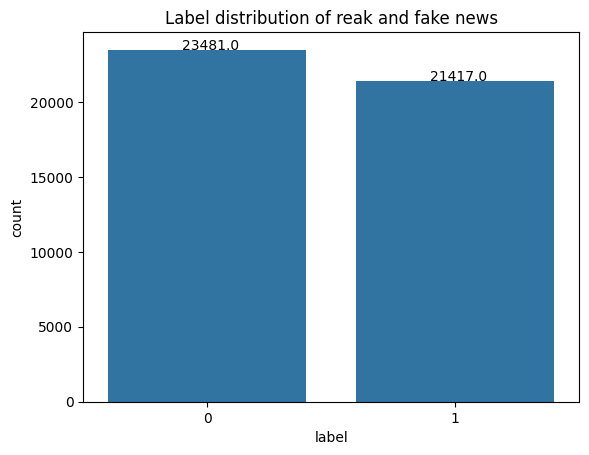

,proportion
label,
0,52.298543
1,47.701457


In [ ]:
sns.countplot(data=df, x="label")
plt.title("Label distribution of reak and fake news")
for p in plt.gca().patches:
    plt.text(p.get_x()+0.3, p.get_height()+1, f"{p.get_height()}", fontsize=10)
plt.show()

df['label'].value_counts(normalize=True)*100

###**1.3. Text Length**

Text(0.5, 1.0, 'Distribution of text length')

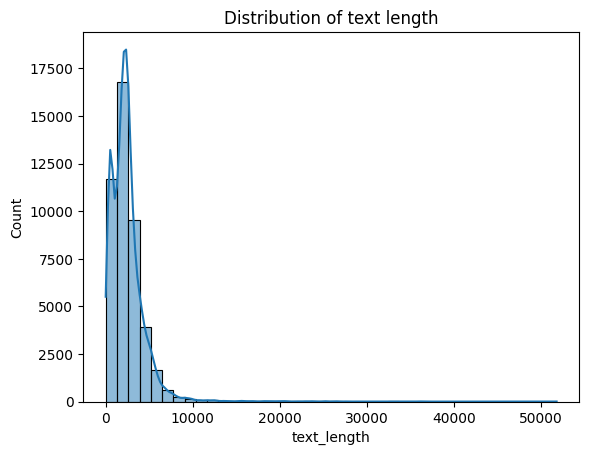

In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
sns.histplot(df['text_length'], bins = 40, kde=True)
plt.title("Distribution of text length")

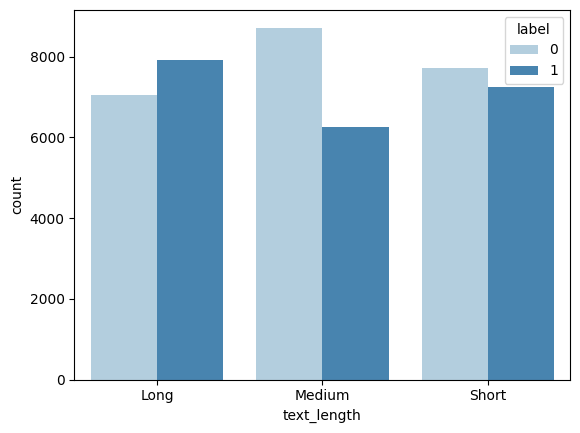

In [ ]:
len_categories = ['Long', 'Medium', 'Short']
quartile_data = pd.qcut(df["text_length"], 3, labels=len_categories)
sns.countplot(x = quartile_data, hue=df["label"], palette="Blues");

###**1.4. Số từ / số ký tự trung bình**

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df.groupby("label")[['text_length', 'word_count']].describe()

text_length                                                         \
            count         mean          std  min     25%     50%     75%   
label                                                                      
0         23481.0  2547.396235  2532.884399  1.0  1433.0  2166.0  3032.0   
1         21417.0  2383.278517  1684.835730  1.0   914.0  2222.0  3237.0   

               word_count                                                    \
           max      count        mean         std  min    25%    50%    75%   
label                                                                         
0      51794.0    23481.0  423.197905  408.388890  0.0  240.0  363.0  506.0   
1      29781.0    21417.0  385.640099  274.006204  0.0  148.0  359.0  525.0   

               
          max  
label          
0      8135.0  
1      5172.0

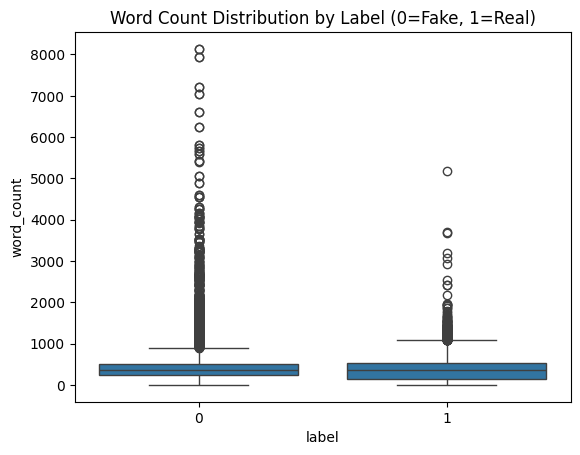

In [ ]:
sns.boxplot(data=df, x='label', y = 'word_count')
plt.title("Word Count Distribution by Label (0=Fake, 1=Real)")
plt.show()

###**1.5. Phân tích text rỗng / bất thường**

In [ ]:
df[df['text'].apply(lambda x: len(str(x).strip()) == 0)]

,title,text,subject,date,label,text_length,word_count
19,FATHER OF BENGHAZI VICTIM TY WOODS SPEAKS UP A...,,politics,"Sep 10, 2016",0,1,0
24,LIVE FEED: INAUGURATION 2017!,,politics,"Jan 20, 2017",0,1,0
124,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,Government News,"Feb 28, 2017",0,1,0
176,DONALD TRUMP TIME PERSON OF THE YEAR: “The rev...,,politics,"Dec 7, 2016",0,1,0
280,CNN CONTRIBUTOR: Trump’s Diversity Coalition ‘...,,politics,"Jan 17, 2017",0,1,0
...,...,...,...,...,...,...,...
44690,JULIAN ASSANGE REVEALS John Podesta’s Hilariou...,,left-news,"Jan 4, 2017",0,1,0
44758,DWAYNE ‘THE ROCK’ JOHNSON’S Awesome Message To...,,politics,"Nov 13, 2016",0,1,0
44822,MARK ZUCKERBERG Rides Shotgun with Dale Earnha...,,left-news,"Mar 14, 2017",0,1,0
44851,2009 DUKES OF HAZARD VIDEO EERILY PREDICTS THE...,,left-news,"Jul 8, 2015",0,1,0


In [ ]:
df[df['text'].apply(lambda x: len(str(x).strip()) == 0)].shape[0]

631

#**2. Pre-Processing** (Long)

###**2.1. Check Data (Null and Duplicated)**

In [ ]:
df_original = df.copy() # run cell này trước khi drop_duplicates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        44898 non-null  object
 1   text         44898 non-null  object
 2   subject      44898 non-null  object
 3   date         44898 non-null  object
 4   label        44898 non-null  int64 
 5   text_length  44898 non-null  int64 
 6   word_count   44898 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [ ]:
# Xóa NaN và rỗng cùng lúc
df = df.dropna(subset=['text'])
df = df[df['text'].apply(lambda x: len(str(x).strip()) > 0)]

In [ ]:
df[df['text'].apply(lambda x: len(str(x).strip()) == 0)].shape[0]

0

In [ ]:
df.shape

(44267, 7)

In [ ]:
import re

# Hàm kiểm tra text là URL
def is_url(text):
    text = str(text).strip()
    url_pattern = r'^https?://\S+$'  # toàn bộ text là link
    return bool(re.match(url_pattern, text))

# Tạo cột mới là True/False nếu là URL
df['is_url'] = df['text'].apply(is_url)

# Đếm số text là URL
num_urls = df['is_url'].sum()
print("Số text là link:", num_urls)

Số text là link: 84


In [ ]:
df.duplicated().sum()

np.int64(209)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### **2.2. Text Cleaning**

##### **2.2.1. Import Libraries**

In [ ]:
import re # xử lý chuỗi
import nltk
from nltk.corpus import stopwords # xử lý các stopwords ("the", "and", "is",...)
from nltk.stem import WordNetLemmatizer # đưa từ về dạng gốc có nghĩa (running -> run, best -> good)

##### **2.2.2. Database Contains Lists of Stopwords and Wordnet**

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

##### **2.2.3. Initialize Lists of Stopwords and Lemmatizer**

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

##### **2.2.4. Cleaning Text Function**

In [ ]:
def clean_text(text):
  if pd.isna(text):
    return pd.NA

  text = re.sub(r'\s+', ' ', text)
  text = text.lower()
  text = re.sub(r'http\S+|www\S+', '', text) # xóa link
  text = re.sub(r'<.*?>', '', text) # xóa html
  text = re.sub(r'[^a-z\s]', '', text) # xóa ký tự đặc biệt và số
  tokens = text.split()
  tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words] # duyệt các từ không
  # nằm trong stopwords, sau đó đưa về dạng gốc
  if not tokens:
        tokens = text.split()

  cleaned = ' '.join(tokens)
  return cleaned if cleaned else pd.NA

In [ ]:
# Raw Tokens
def raw_tokens(text):
  return text.split()

In [ ]:
df = df[~df['text'].str.contains(r'http\S+|www\S+', na=False)] # Giữ lại những rows không chứa link

In [ ]:
df['raw_tokens'] = df['text'].apply(raw_tokens)

In [ ]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,"Donald Trump s White House is in chaos, and th...",donald trump white house chaos trying cover ru...
2,Mike Pence is a huge homophobe. He supports ex...,mike penny huge homophobe support exgay conver...
3,SAN FRANCISCO (Reuters) - California Attorney ...,san francisco reuters california attorney gene...
4,Twisted reasoning is all that comes from Pelos...,twisted reasoning come pelosi day especially p...
5,WASHINGTON (Reuters) - As a lawyer in private ...,washington reuters lawyer private practice dec...


*italicized text*#### **2.3. Save as New File**

In [ ]:
#df_cleaned = df.copy()
#df_cleaned['text'] = df_cleaned['cleaned_text']
#df_cleaned.drop(columns=['cleaned_text'], inplace=True)

In [ ]:
df.head()

,title,text,subject,date,label,text_length,word_count,is_url,raw_tokens,cleaned_text
0,Dems Furious After Rosenstein Briefing,Democrats are reportedly furious at deputy att...,News,"May 21, 2017",0,2869,466,False,"[Democrats, are, reportedly, furious, at, depu...",democrat reportedly furious deputy attorney ge...
1,COLLEGE PROFESSOR CAUGHT ON TAPE: You Can’t Ha...,Close your eyes and imagine a white professor ...,politics,"Apr 9, 2016",0,2123,355,False,"[Close, your, eyes, and, imagine, a, white, pr...",close eye imagine white professor telling stud...
2,WATCH: Donald Trump Suggests President Obama ...,In the wake of the worst mass shooting in Amer...,News,"June 13, 2016",0,2777,485,False,"[In, the, wake, of, the, worst, mass, shooting...",wake worst mass shooting american history comm...
3,DEVASTATING 30 SECOND Commercial Shows Scary T...,"First it was the FLUSH TARGET campaign, where...",politics,"May 26, 2016",0,387,68,False,"[First, it, was, the, FLUSH, TARGET, campaign,...",first flush target campaign truck travel every...
4,Uncle of Benghazi Victim Sean Smith: “Hillary ...,Hillary Clinton is a serial liar. Hillary Cli...,politics,"Oct 23, 2015",0,345,58,False,"[Hillary, Clinton, is, a, serial, liar., Hilla...",hillary clinton serial liar hillary clinton ha...


In [ ]:
df.to_csv('/content/drive/MyDrive/DataAnalyst/Data_clean/cleaned_data.csv', index=False)

#**3. EDA (Exploration Data Analysis) nâng cao sau khi pre-processing**

###**3.1. Phân tích ngôn ngữ và tần suất**

###Load cleaned_data

In [ ]:
df_cleaned = pd.read_csv("./Data_clean/cleaned_data.csv")
df_cleaned.head()

,title,text,subject,date,label,text_length,word_count,is_url,raw_tokens,cleaned_text
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,2114,361,False,"['Donald', 'Trump', 's', 'White', 'House', 'is...",donald trump white house chaos trying cover ru...
1,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,2402,379,False,"['Mike', 'Pence', 'is', 'a', 'huge', 'homophob...",mike penny huge homophobe support exgay conver...
2,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,629,88,False,"['SAN', 'FRANCISCO', '(Reuters)', '-', 'Califo...",san francisco reuters california attorney gene...
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,793,138,False,"['Twisted', 'reasoning', 'is', 'all', 'that', ...",twisted reasoning come pelosi day especially p...
4,"As private lawyer, Trump high court pick was f...",WASHINGTON (Reuters) - As a lawyer in private ...,politicsNews,"February 1, 2017",1,5327,860,False,"['WASHINGTON', '(Reuters)', '-', 'As', 'a', 'l...",washington reuters lawyer private practice dec...


In [ ]:
df_cleaned['cleaned_text'].isnull().sum()

np.int64(0)

####WordCloud cho mỗi loại nhãn

In [ ]:
from wordcloud import WordCloud

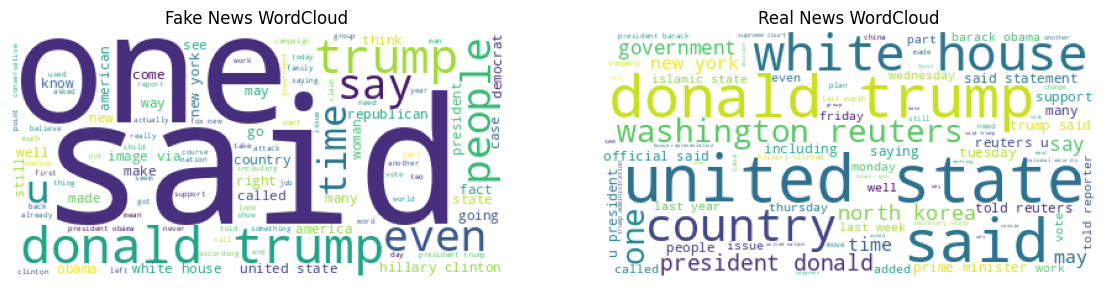

In [ ]:
fake_text = ' '.join(df_cleaned[df_cleaned['label']==0]['cleaned_text'])
real_text = ' '.join(df_cleaned[df_cleaned['label']==1]['cleaned_text'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(max_words=100, background_color='white').generate(fake_text))
plt.title('Fake News WordCloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(max_words=100, background_color='white').generate(real_text))
plt.title('Real News WordCloud')
plt.axis('off')
plt.show()

####Top từ phổ biến nhất (Top Words)

<Axes: title={'center': 'Top 15 Words - REAL'}, xlabel='word'>

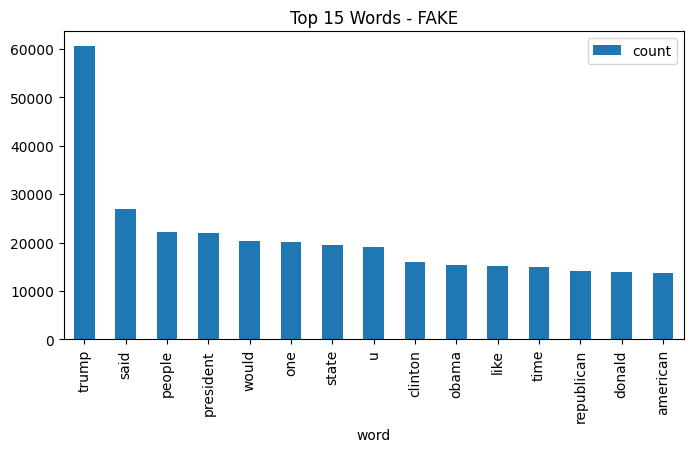

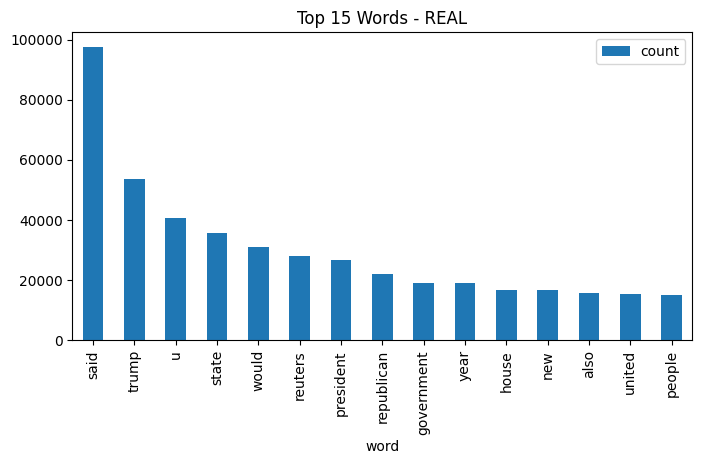

In [ ]:
from collections import Counter

fake_words = ' '.join(df_cleaned[df_cleaned['label']==0]['cleaned_text']).split()
real_words = ' '.join(df_cleaned[df_cleaned['label']==1]['cleaned_text']).split()

fake_common = Counter(fake_words).most_common(15)
real_common = Counter(real_words).most_common(15)

# FAKE
pd.DataFrame(fake_common, columns=['word','count']).plot.bar(
    x='word', y='count', title='Top 15 Words - FAKE', figsize=(8,4)
)
# REAL
pd.DataFrame(real_common, columns=['word','count']).plot.bar(
    x='word', y='count', title='Top 15 Words - REAL', figsize=(8,4)
)

###**3.2. Phân tích n-gram**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def get_top_ngram(corpus, n=None, ngram_range=(1,1)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

top_fake = get_top_ngram(df_cleaned[df_cleaned['label']==0]['cleaned_text'], n=20, ngram_range=(2,2))
top_real = get_top_ngram(df_cleaned[df_cleaned['label']==1]['cleaned_text'], n=20, ngram_range=(2,2))

print("Top Fake bigrams:")
print(pd.DataFrame(top_fake, columns=['bigram', 'count']).head(10))

print("\nTop Real bigrams:")
print(pd.DataFrame(top_real, columns=['bigram', 'count']).head(10))

Top Fake bigrams:
            bigram  count
0     donald trump  12398
1  hillary clinton   5627
2     united state   5447
3      white house   5334
4         new york   3502
5  president obama   3274
6  president trump   2932
7         fox news   2463
8     barack obama   1936
9       st century   1875

Top Real bigrams:
               bigram  count
0        united state  11965
1        donald trump  10062
2         white house   8268
3  washington reuters   6448
4    president donald   5857
5         north korea   5456
6            new york   4406
7      prime minister   4113
8      said statement   3905
9       official said   3561


###**3.3. Phân tích ký tự in hoa / dấu chấm than**

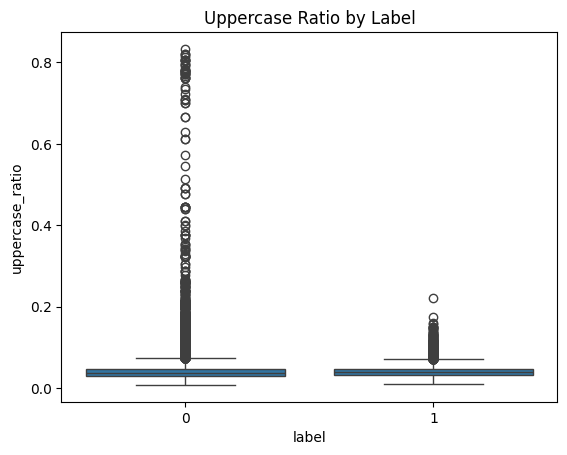

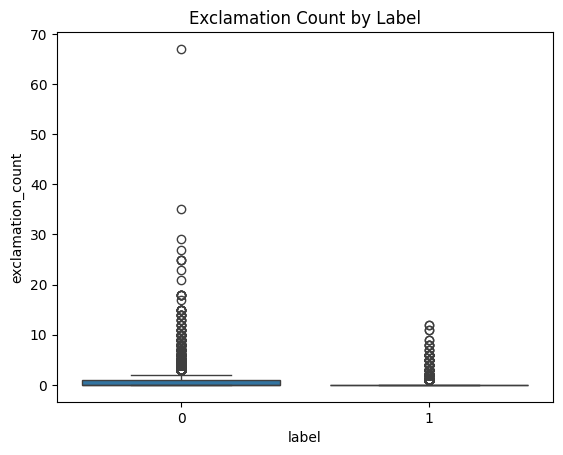

In [ ]:
df_cleaned['uppercase_ratio'] = df_cleaned['text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / (len(str(x)) + 1))
df_cleaned['exclamation_count'] = df_cleaned['text'].apply(lambda x: str(x).count('!'))

sns.boxplot(x='label', y='uppercase_ratio', data=df_cleaned)
plt.title('Uppercase Ratio by Label')
plt.show()

sns.boxplot(x='label', y='exclamation_count', data=df_cleaned)
plt.title('Exclamation Count by Label')
plt.show()

###**3.4. Phân tích độ cảm xúc (Sentiment Analysis)**

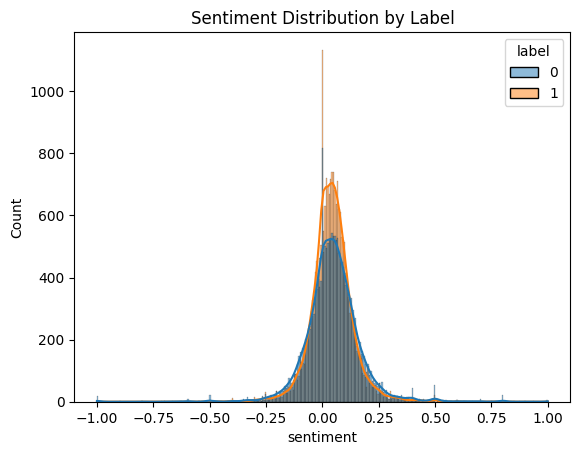

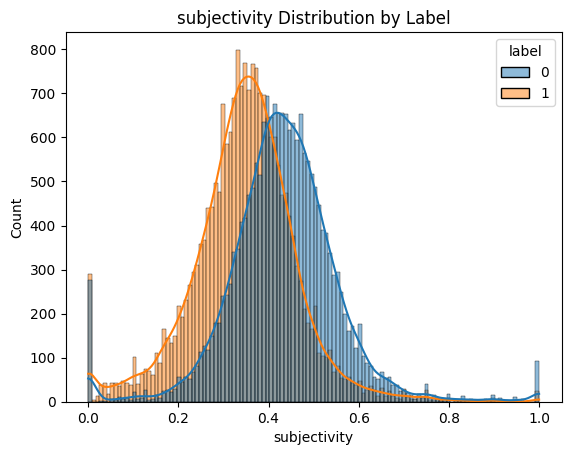

In [ ]:
from textblob import TextBlob

df_cleaned['sentiment'] = df_cleaned['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_cleaned['subjectivity'] = df_cleaned['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
sns.histplot(df_cleaned, x='sentiment', hue='label', kde=True)
plt.title('Sentiment Distribution by Label')
plt.show()

sns.histplot(df_cleaned, x='subjectivity', hue='label', kde=True)
plt.title('subjectivity Distribution by Label')
plt.show()

###**3.5. Phân tích tương quan giữa các đặc trưng hình thức**

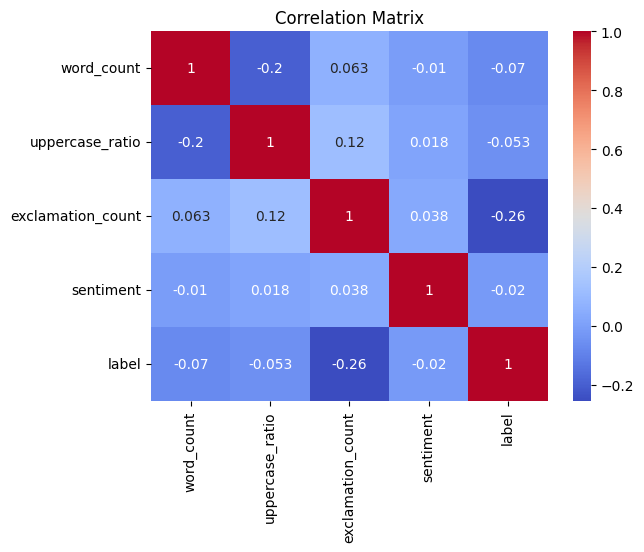

In [ ]:
corr = df_cleaned[['word_count', 'uppercase_ratio', 'exclamation_count', 'sentiment', 'label']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

###**3.6. Phân tích số lượng từ “nhấn mạnh” theo loại tin**

##### Tự động tạo danh sách từ “nhấn mạnh” (emphatic words)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import opinion_lexicon
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [ ]:
# 1. Lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# 2. TF-IDF đặc trưng cho Fake News
tfidf = TfidfVectorizer(stop_words='english', min_df=3, max_df=0.8)
X_tfidf = tfidf.fit_transform(df_cleaned['cleaned_text'])
words = np.array(tfidf.get_feature_names_out())

fake_idx = (df_cleaned['label'] == 0).values
real_idx = (df_cleaned['label'] == 1).values

fake_mean = np.array(X_tfidf[fake_idx].mean(axis=0)).flatten()
real_mean = np.array(X_tfidf[real_idx].mean(axis=0)).flatten()

ratio = fake_mean / (real_mean + 1e-6)
top_fake_idx = np.argsort(ratio)[-200:]
fake_keywords = set(words[top_fake_idx])

# 3. Hợp nhất
emphatic = fake_keywords | positive_words | negative_words
emphatic = list(emphatic)
print(f"Tổng số từ emphatic: {len(emphatic)}")

Tổng số từ emphatic: 6981


In [ ]:
emphatic[:10]

['disorderly',
 'hug',
 'panicking',
 'jealousy',
 'valor',
 'inestimable',
 'lech',
 'clueless',
 'innovative',
 'prefers']

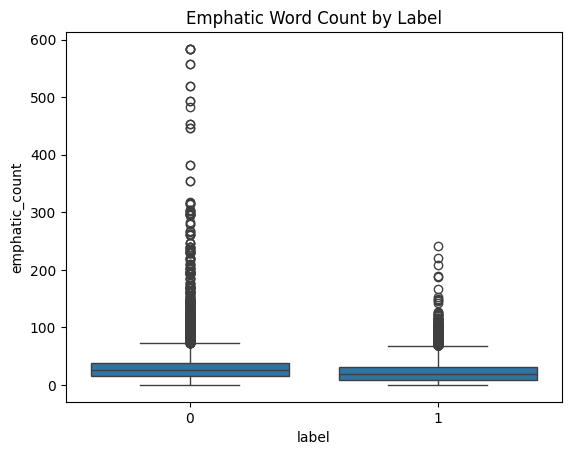

In [ ]:
emphatic_set = set(emphatic)
joblib.dump(emphatic_set, "/content/drive/MyDrive/DataAnalyst/artifacts/emphatic_set.pkl")
def count_emphatic(text):
    return sum(1 for w in text.split() if w in emphatic_set)

df_cleaned['emphatic_count'] = df_cleaned['cleaned_text'].apply(count_emphatic)

sns.boxplot(x='label', y='emphatic_count', data=df_cleaned)
plt.title("Emphatic Word Count by Label")
plt.show()

###**3.7. Save Final Dataset**

In [ ]:
df_cleaned.to_csv('/content/drive/MyDrive/DataAnalyst/Data_clean/cleaned_with_features.csv', index=False)

#**4. Feature Engineering**

In [ ]:
df_cleaned = pd.read_csv("./Data_clean/cleaned_with_features.csv")

In [ ]:
df_cleaned.head(5)

,title,text,subject,date,label,text_length,word_count,is_url,raw_tokens,cleaned_text,uppercase_ratio,exclamation_count,sentiment,subjectivity,emphatic_count
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,2114,361,False,"['Donald', 'Trump', 's', 'White', 'House', 'is...",donald trump white house chaos trying cover ru...,0.036407,0,-0.148395,0.484524,42
1,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,2402,379,False,"['Mike', 'Pence', 'is', 'a', 'huge', 'homophob...",mike penny huge homophobe support exgay conver...,0.052018,0,0.263821,0.561639,27
2,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,629,88,False,"['SAN', 'FRANCISCO', '(Reuters)', '-', 'Califo...",san francisco reuters california attorney gene...,0.044444,0,0.124416,0.418052,4
3,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,793,138,False,"['Twisted', 'reasoning', 'is', 'all', 'that', ...",twisted reasoning come pelosi day especially p...,0.036524,0,-0.055729,0.648438,6
4,"As private lawyer, Trump high court pick was f...",WASHINGTON (Reuters) - As a lawyer in private ...,politicsNews,"February 1, 2017",1,5327,860,False,"['WASHINGTON', '(Reuters)', '-', 'As', 'a', 'l...",washington reuters lawyer private practice dec...,0.028904,0,0.113071,0.403023,52


In [ ]:
X_text = df_cleaned['cleaned_text']
numeric_cols = ['text_length', 'word_count', 'uppercase_ratio', 'exclamation_count',
                'sentiment', 'emphatic_count', 'subjectivity']
X_numeric = df_cleaned[numeric_cols]
y = df_cleaned['label']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train_text, X_test_text, X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=3, max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [ ]:
from scipy.sparse import hstack, csr_matrix
X_train_final = hstack([csr_matrix(X_train_scaled), X_train_tfidf])
X_test_final = hstack([csr_matrix(X_test_scaled), X_test_tfidf])

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('opinion_lexicon')
from nltk.corpus import stopwords, opinion_lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [ ]:
fake_idx_train = (y_train == 0).values
X_tfidf_train_array = X_train_tfidf.toarray()
fake_mean = X_tfidf_train_array[fake_idx_train].mean(axis=0)
real_mean = X_tfidf_train_array[~fake_idx_train].mean(axis=0)
words = np.array(tfidf.get_feature_names_out())
ratio = fake_mean / (real_mean + 1e-6)
top_fake_idx = np.argsort(ratio)[-200:]
fake_keywords = set(words[top_fake_idx])

In [ ]:
emphatic_set = fake_keywords | positive_words | negative_words

#**5 Training model** (Long)

### **5.1. Training/Test Split**

### **5.2. Định nghĩa model base**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='liblinear', random_state=42)

In [ ]:
param_grid = {'C':[0.5,1,5,10], 'penalty':['l1','l2']}

### **5.3. Grid Search CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

### **5.4. Train model với K-Fold CV**

In [ ]:
grid_search.fit(X_train_final, y_train)
best_model = grid_search.best_estimator_

print("Best params:", grid_search.best_params_)
print("Best CV score:", round(grid_search.best_score_,3))

Best params: {'C': 10, 'penalty': 'l1'}
Best CV score: 0.995


In [ ]:
import joblib
joblib.dump(best_model, "./artifacts/fake_news_model.pkl")
joblib.dump(tfidf, "./artifacts/tfidf_vectorizer.pkl")
joblib.dump(scaler, "./artifacts/scaler_numeric.pkl")
joblib.dump(emphatic_set, "./artifacts/emphatic_set.pkl")
y_train.to_csv("./artifacts/label_vector.csv", index=False)

### **5.5. Predict**

In [ ]:
y_pred = best_model.predict(X_test_final)
train_pred = best_model.predict(X_train_final)

### **5.6. Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, train_pred)
print("Train Accuracy:", round(train_acc, 3))
print('Accuracy on Test Set:', round(test_acc, 3))

Train Accuracy: 1.0
Accuracy on Test Set: 0.994


In [ ]:
print("Best CV Score (Validation Accuracy):", round(grid_search.best_score_, 3))

Best CV Score (Validation Accuracy): 0.995


###**5.7. Lưu mô hình**

In [ ]:
import joblib

In [ ]:
joblib.dump(best_model, "./artifacts/fake_news_model.pkl")

['./artifacts/fake_news_model.pkl']

#**6. Evaluation** (Long)




### **6.1. Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Fake (0)', 'True (1)']))

              precision    recall  f1-score   support

    Fake (0)       0.99      0.99      0.99      3898
    True (1)       0.99      1.00      0.99      4234

    accuracy                           0.99      8132
   macro avg       0.99      0.99      0.99      8132
weighted avg       0.99      0.99      0.99      8132



### **6.2. Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3867   31]
 [  20 4214]]


### **6.3. Trực quan hóa Confusion Matrix**

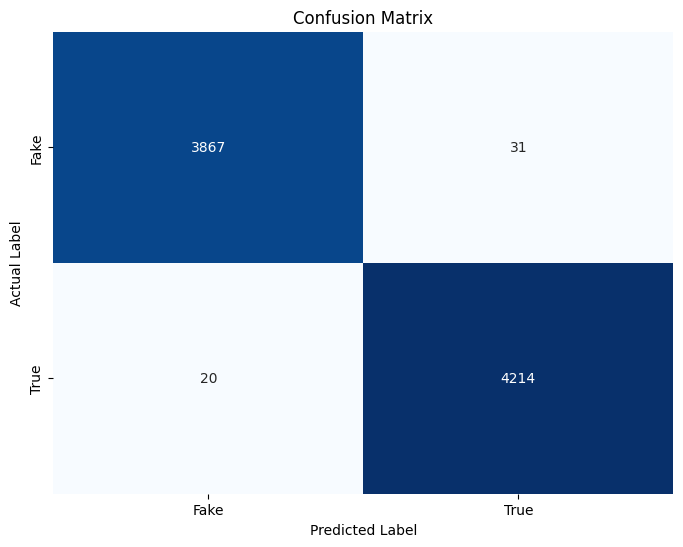

In [ ]:
labels = ['Fake', 'True']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#####Số lượng tin Fake dự đoán đúng là Fake: 3867
#####Số lượng tin Fake dự đoán sai là True: 31
#####Số lượng tin True dự đoán sai là Fake: 21
#####Số lượng tin True dự đoán đúng là True: 4213

### **6.4. Giải thích Confusion Matrix**

In [ ]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
# Độ chính xác (Precision) và độ nhạy (Recall)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'Tổng số mẫu kiểm tra: {len(y_test)}')
print(f'True Negative (TN): {TN} (Dự đoán đúng Fake)')
print(f'False Positive (FP): {FP} (Dự đoán sai thành True)')
print(f'False Negative (FN): {FN} (Dự đoán sai thành Fake)')
print(f'True Positve (TP): {TP} (Dự đoán đúng True)')
print(f'Precision: {round(precision, 2)}')
print(f'Recall: {round(recall, 2)}')

Tổng số mẫu kiểm tra: 8132
True Negative (TN): 3867 (Dự đoán đúng Fake)
False Positive (FP): 31 (Dự đoán sai thành True)
False Negative (FN): 20 (Dự đoán sai thành Fake)
True Positve (TP): 4214 (Dự đoán đúng True)
Precision: 0.99
Recall: 1.0


#**7. Manual Test**

In [ ]:
import re
import numpy as np
import pandas as pd
import joblib
from scipy.sparse import hstack, csr_matrix
from nltk.corpus import stopwords, opinion_lexicon
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import nltk
from sklearn.preprocessing import RobustScaler

# ---------- NLTK resources ----------
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('opinion_lexicon')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# ---------- Load artifacts ----------
model = joblib.load("./artifacts/fake_news_model.pkl")
tfidf = joblib.load("./artifacts/tfidf_vectorizer.pkl")
emphatic_set = joblib.load("./artifacts/emphatic_set.pkl")

# ---------- Count emphatic ----------
def count_emphatic(text):
    return sum(1 for w in text.split() if w in emphatic_set)

# ---------- Clean text ----------
def clean_text_infer(text):
    text = str(text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return ' '.join(tokens) if tokens else ""

# ---------- Extract features ----------
def extract_features(text):
    clean = clean_text_infer(text)

    # Numeric features
    numeric = pd.DataFrame({
        'text_length': [len(clean)],
        'word_count': [len(clean.split())],
        'uppercase_ratio': [sum(1 for c in text if c.isupper()) / (len(text)+1)],
        'exclamation_count': [text.count('!')],
        'sentiment': [TextBlob(clean).sentiment.polarity],
        'emphatic_count': [count_emphatic(clean)],
        'subjectivity': [TextBlob(clean).sentiment.subjectivity]
    })

    # Robust scaling (tránh lệch numeric lớn)
    numeric_scaled = scaler.transform(numeric)
    numeric_sparse = csr_matrix(numeric_scaled)

    # TF-IDF vector
    tfidf_vec = tfidf.transform([clean])

    # Combine numeric + TF-IDF
    final_features = hstack([numeric_sparse, tfidf_vec])
    return final_features

# ---------- Predict ----------
def predict_news(text):
    features = extract_features(text)
    pred = model.predict(features)[0]
    prob = model.predict_proba(features)[0][1]
    label = "REAL" if pred == 1 else "FAKE"
    return label, round(prob, 3)

# ---------- Test ----------
text = str(input("Enter news text: "))
label, prob = predict_news(text)
print(f"\nText: {text}")
print(f"→ Prediction: {label} (probability REAL={prob})")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


Enter news text: A recent peer-reviewed study published by UN claims statistical evidence about politics, reporting measured changes and confidence intervals. A recent peer-reviewed study published by IMF uncovers statistical evidence about politics, reporting measured changes and confidence intervals. A recent peer-reviewed study published by Interpol warns statistical evidence about politics, reporting measured changes and confidence intervals. A recent peer-reviewed study published by Interpol uncovers statistical evidence about politics, reporting measured changes and confidence intervals. A recent peer-reviewed study published by WHO uncovers statistical evidence about politics, reporting measured changes and confidence intervals. A recent peer-reviewed study published by Apple claims statistical evidence about politics, reporting measured changes and confidence intervals. Reported numbers: 6904 cases, 477 deaths, 65588 views.

Text: A recent peer-reviewed study published by UN cl

In [ ]:
label, prob = predict_news(text)
print(f"Prediction: {label}, REAL prob = {prob}")

Prediction: FAKE, REAL prob = 0.001


In [ ]:
features = extract_features(text)
numeric_part = features[:, :7].toarray()
tfidf_sum = features[:, 7:].sum()
print("Numeric features:", numeric_part)
print("Sum TF-IDF vector:", tfidf_sum)

Numeric features: [[-0.79897787 -0.92711098 -0.70950846 -0.29272843 -0.39810177 -0.79585006
  -1.07156765]]
Sum TF-IDF vector: 3.172679151357242
